In [1]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
import overlap_integrals as oi

In [11]:
reload(oi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [2]:
xs = np.linspace(0,100,200)
ys = np.linspace(0,100,201)
zs = np.linspace(0,100,203)
# Xs, Ys = np.meshgrid(xs, ys, indexing='ij')
Xs, Ys, Zs = np.meshgrid(xs, ys, zs, indexing='ij')

In [3]:
# fw_gauss = np.exp(-(Xs**2+Ys**2))/2**2
# mygauss = oi.field(fieldvalues=fw_gauss, var=[xs,ys], coord_sys="cartesian")
# mygauss = oi.field(fieldvalues=fw_gauss, coordinates={"x": xs, "y": ys}, vocal=True)
fw_gauss = np.exp(-(Xs**2+Ys**2+Zs**2))/2**2
# mygauss = oi.field(fieldvalues=fw_gauss, coordinates=[xs,ys,zs], dims=["x",'y','z'])
mygauss = oi.field(fieldvalues=fw_gauss, coordinates={"x": xs, "y": ys, "z": zs})
fw_sphere = 1* (np.sqrt(Xs**2+Ys**2+Zs**2) <= 50)
# mysphere = oi.field(fieldvalues=fw_sphere, coordinates=[xs,ys,zs], coord_sys="cartesian")
mysphere = oi.field(fieldvalues=fw_sphere, coordinates={"x": xs, "y": ys, "z": zs})

In [4]:
mygauss + mysphere
mygauss - mysphere
mygauss * mysphere
mygauss / mysphere

/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py:245: RuntimeWarning: invalid value encountered in divide
  return field(self.values/other.values, self.coordinates)


field in 3D, cartesian coordinates ['x', 'y', 'z'] with shape (200, 201, 203)

In [7]:
mysphere.normalize_abs2().overlap(mysphere.normalize_abs2())

1.0000000000000009

In [5]:
mygauss.integrate_all_dimensions(vocal=True)

integrating dimension 0: x from 0.0 to 100.0
integrating dimension 1: y from 0.0 to 100.0
integrating dimension 2: z from 0.0 to 100.0


0.17401024990099084

In [6]:
mygauss.normalize().integrate_all_dimensions(vocal=True)

integrating dimension 0: x from 0.0 to 100.0
integrating dimension 1: y from 0.0 to 100.0
integrating dimension 2: z from 0.0 to 100.0


1.0000000000000002

In [7]:
mygauss.normalize_abs2().integrate_all_dimensions()

1.4031041346855608

In [8]:
(abs(mygauss.normalize_abs2())**2).integrate_all_dimensions()

1.0

In [9]:
mygauss == mysphere

False

In [10]:
mysphere.integrate_all_dimensions()

65447.736827702865

In [11]:
4/3*np.pi*50**3 / 8

65449.84694978735

In [12]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
phis = np.linspace(0,2*np.pi,201)
zs = np.linspace(0,100,203)
Rs, Phis, Zs = np.meshgrid(rs, phis, zs, indexing='ij')

In [15]:
reload(oi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [13]:
fw_cyl = 1* (Rs <= 50) & (Zs <= 20)
mysphere_cyl = oi.field(fieldvalues=fw_cyl, coordinates={"r": rs, "phi": phis, "z": zs}, vocal=True)
# mysphere_cyl = oi.field(fieldvalues=fw_cyl, var=[rs,phis,zs], coord_sys="cylindrical")

inputs are valid
field in 3D, cylindrical coordinates ['r', 'phi', 'z'] with shape (200, 201, 203)


In [14]:
mysphere_cyl.integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: phi from 0.0 to 6.283185307179586
integrating dimension 2: z from 0.0 to 100.0


157070.80610784283

In [15]:
mysphere_cyl.integrate_dimensions(["r",'z','phi'], vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: z from 0.0 to 100.0
integrating dimension 2: phi from 0.0 to 6.283185307179586


157070.80610784225

In [16]:
mysphere_cyl.normalize().integrate_all_dimensions()

0.9999999999999925

In [17]:
mysphere_cyl.normalize_abs2().integrate_all_dimensions()

396.32159429917715

In [18]:
(abs(mysphere_cyl.normalize_abs2())**2).integrate_all_dimensions()

0.9999999999999925

In [19]:
np.pi*50**2*20

157079.63267948967

In [20]:
reload(oi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [35]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
thetas = np.linspace(0,np.pi,203)
phis = np.linspace(0,2*np.pi,201)
Rs, Thetas, Phis = np.meshgrid(rs,thetas, phis, indexing='ij')

In [36]:
fw_sph = 1* (Rs <= 50) & (Thetas <= np.pi/2) & (Phis <= np.pi/2)
mysphere_sph = oi.field(fieldvalues=fw_sph, coordinates={"r": rs, "theta": thetas, "phi": phis}, vocal=True)

inputs are valid
field in 3D, spherical coordinates ['r', 'theta', 'phi'] with shape (200, 203, 201)


In [23]:
mysphere_sph.integrate_dimensions(['phi'], vocal=True).integrate_dimensions(["theta"], vocal=True).integrate_dimensions(["r"], vocal=True)

integrating dimension 0: phi from 0.0 to 6.283185307179586
inputs are valid
field in 2D, spherical coordinates ['r', 'theta'] with shape (200, 203)
integrating dimension 0: theta from 0.0 to 3.141592653589793
inputs are valid
field in 1D, spherical coordinates ['r'] with shape (200,)
integrating dimension 0: r from 0.0 to 75.0


65051.19034114659

In [24]:
mysphere_sph.integrate_dimensions(["theta"], vocal=True).integrate_dimensions(["r",'phi'], vocal=True)

integrating dimension 0: theta from 0.0 to 3.141592653589793
inputs are valid
field in 2D, spherical coordinates ['r', 'phi'] with shape (200, 201)
integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: phi from 0.0 to 6.283185307179586


65051.190341146576

In [25]:
mysphere_sph.integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1953.990472134063

In [26]:
mysphere_sph.normalize().integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1.0

In [27]:
mysphere_sph.normalize_abs2().integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


44.20396443910959

In [28]:
(abs(mysphere_sph.normalize_abs2())**2).integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1.0

In [29]:
4/3*np.pi*50**3 / 8

65449.84694978735

In [43]:
reload(oi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [44]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
thetas = np.linspace(0,np.pi,203)
phis = np.linspace(0,2*np.pi,201)
Rs, Thetas, Phis = np.meshgrid(rs,thetas, phis, indexing='ij')

In [45]:
fw_sph = 1* (Rs <= 50) & (Thetas <= np.pi/2) & (Phis <= np.pi/2)
mysphere_sph = oi.field(fieldvalues=fw_sph, coordinates={"r": rs, "theta": thetas, "phi": phis}, vocal=True)

inputs are valid
field in 3D, spherical coordinates ['r', 'theta', 'phi'] with shape (200, 203, 201)


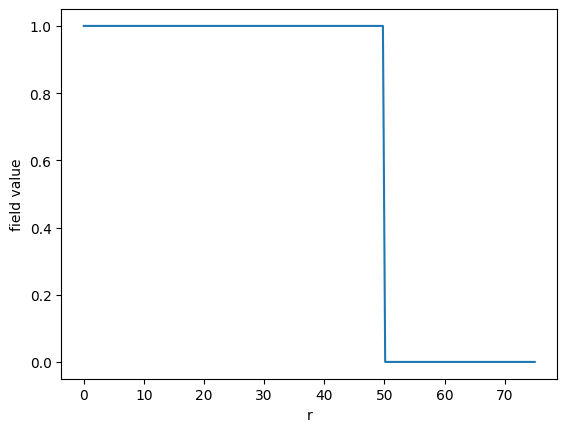

In [50]:
mysphere_sph.plot_1D("r", icuts={"theta": 0, "phi": 0})